## Imports

In [1]:
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import plotnine as p9

## Read In The Data

In [3]:
df_all = pd.read_csv('candidates_byday_all.csv')
len(df_all)

14838

In [4]:
df_fox = pd.read_csv('candidates_byday_FOX.csv')
len(df_fox)

14164

In [5]:
df_cnn = pd.read_csv('candidates_byday_CNN.csv')
len(df_cnn)

13098

In [6]:
df_msnbc = pd.read_csv('candidates_byday_MSNBC.csv')
len(df_msnbc)

13826

## Transform to Long Data

In [7]:
df_all['Time'] = pd.to_datetime(df_all['Time'])
df_all = df_all.pivot(index='Time', columns='Query', values='Value')
all_long = df_all.stack().reset_index().rename(columns={0: "Value"})

In [19]:
all_long

,Time,Query,Value,MovAvg
0,2010-01-01,"name=""donald trump""",42.015,42.015000
1,2010-01-01,"name=""hillary clinton""",54.024,54.024000
2,2010-01-01,"name=""joe biden""",162.060,162.060000
3,2010-01-02,"name=""donald trump""",201.132,121.573500
4,2010-01-02,"name=""hillary clinton""",186.135,120.079500
...,...,...,...,...
14833,2023-11-04,"name=""joe biden""",1703.846,1736.024286
14834,2023-11-05,"name=""donald trump""",3764.301,1986.290857
14835,2023-11-05,"name=""joe biden""",3106.267,2003.682857
14836,2023-11-06,"name=""donald trump""",9787.853,2993.567143


In [8]:
df_fox['Time'] = pd.to_datetime(df_fox['Time'])
df_fox = df_fox.pivot(index='Time', columns='Query', values='Value')
fox_long = df_fox.stack().reset_index().rename(columns={0: "Value"})

In [9]:
df_cnn['Time'] = pd.to_datetime(df_cnn['Time'])
df_cnn = df_cnn.pivot(index='Time', columns='Query', values='Value')
cnn_long = df_cnn.stack().reset_index().rename(columns={0: "Value"})

In [10]:
df_msnbc['Time'] = pd.to_datetime(df_msnbc['Time'])
df_msnbc = df_msnbc.pivot(index='Time', columns='Query', values='Value')
msnbc_long = df_msnbc.stack().reset_index().rename(columns={0: "Value"})

## Moving Averages

In [11]:
all_long['MovAvg'] = all_long.groupby('Query')['Value'].transform(lambda x: x.rolling(7, min_periods=1).mean())
fox_long['MovAvg'] = fox_long.groupby('Query')['Value'].transform(lambda x: x.rolling(7, min_periods=1).mean())
cnn_long['MovAvg'] = cnn_long.groupby('Query')['Value'].transform(lambda x: x.rolling(7, min_periods=1).mean())
msnbc_long['MovAvg'] = msnbc_long.groupby('Query')['Value'].transform(lambda x: x.rolling(7, min_periods=1).mean())

## Plots in p9

/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:223: FutureWarning: is_categorical_dtype is deprecated and wi

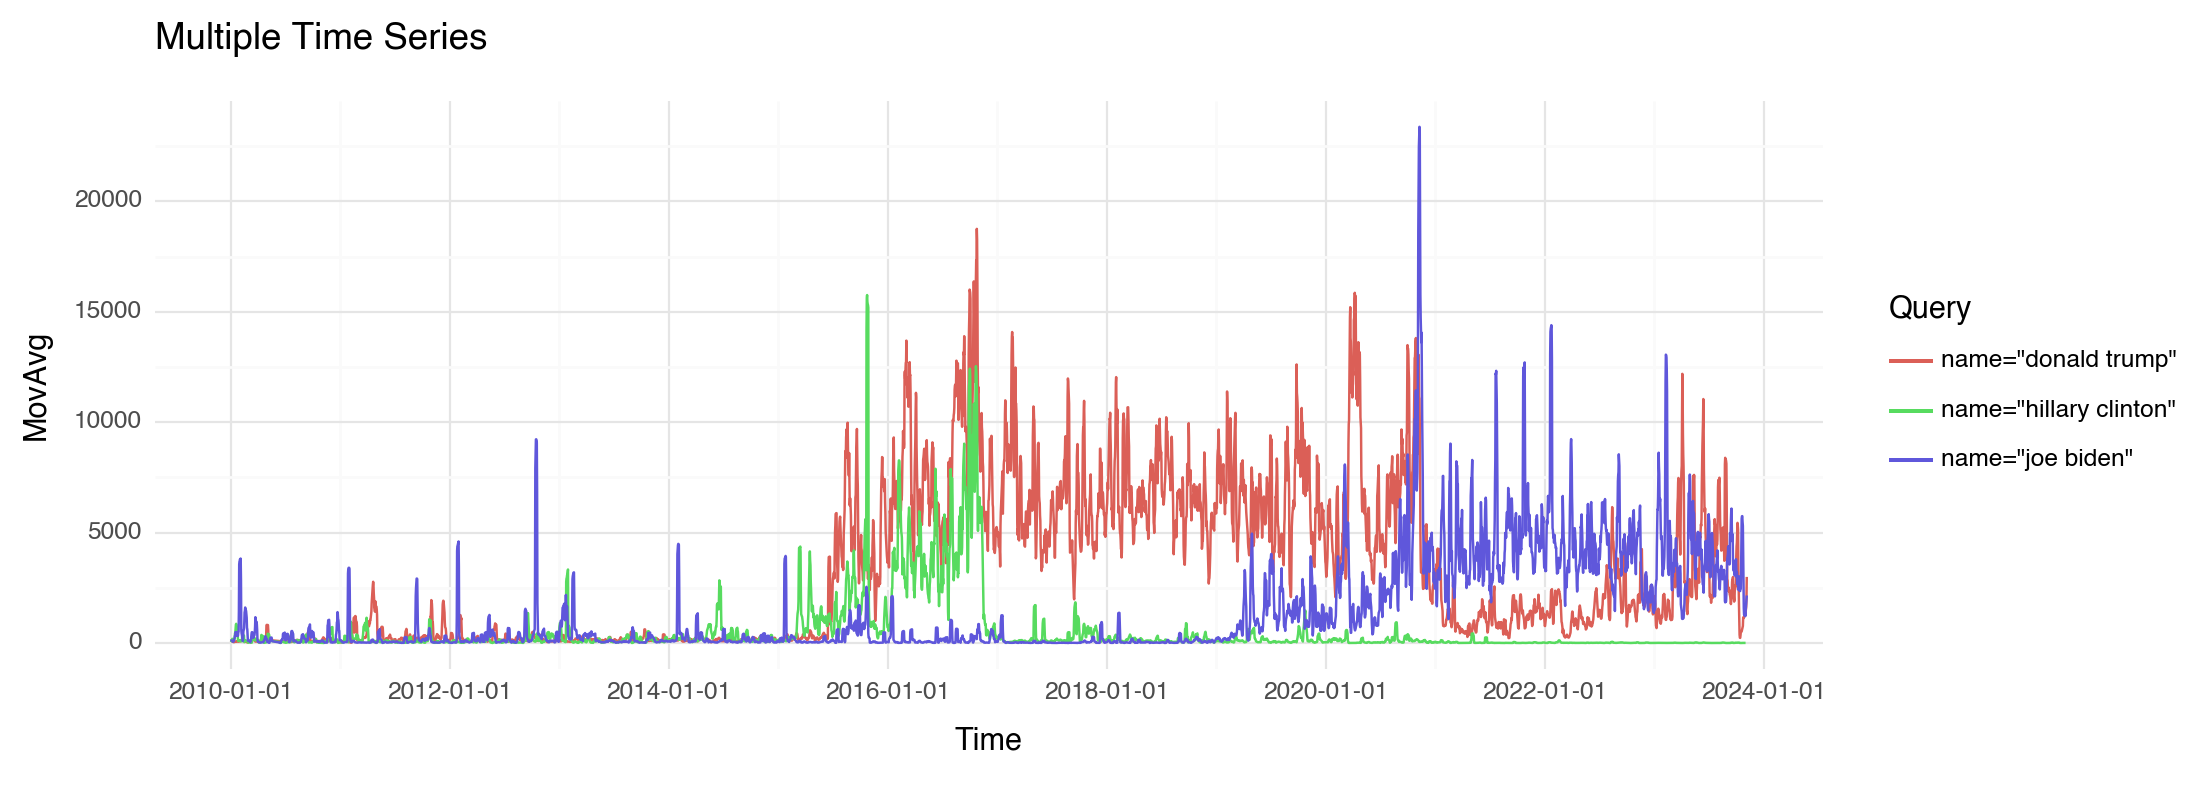

<Figure Size: (1100 x 400)>

In [12]:
(p9.ggplot(all_long, p9.aes(x='Time', y='MovAvg', color='Query'))
 + p9.geom_line()
 + p9.theme_minimal()
 + p9.theme(figure_size=(11, 4))
 + p9.labs(title='Multiple Time Series', x='Time', y='MovAvg'))

/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


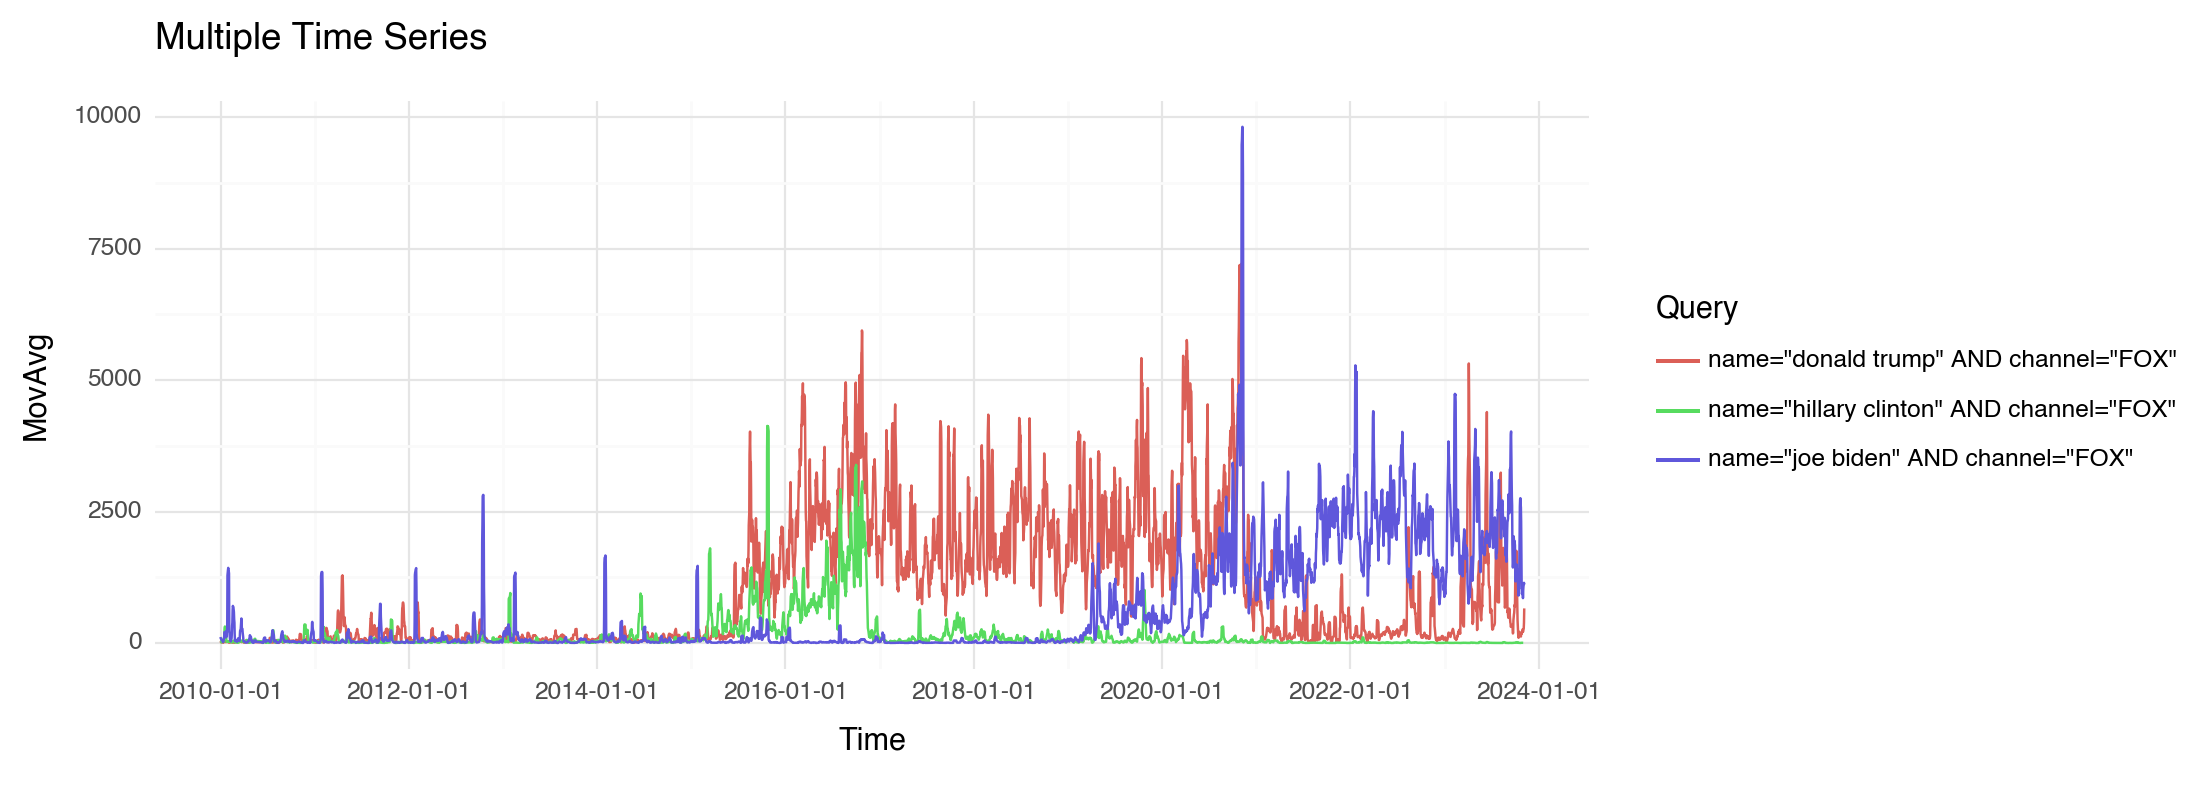

<Figure Size: (1100 x 400)>

In [13]:
(p9.ggplot(fox_long, p9.aes(x='Time', y='MovAvg', color='Query'))
 + p9.geom_line()
 + p9.theme_minimal()
 + p9.theme(figure_size=(11, 4))
 + p9.labs(title='Multiple Time Series', x='Time', y='MovAvg'))

/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


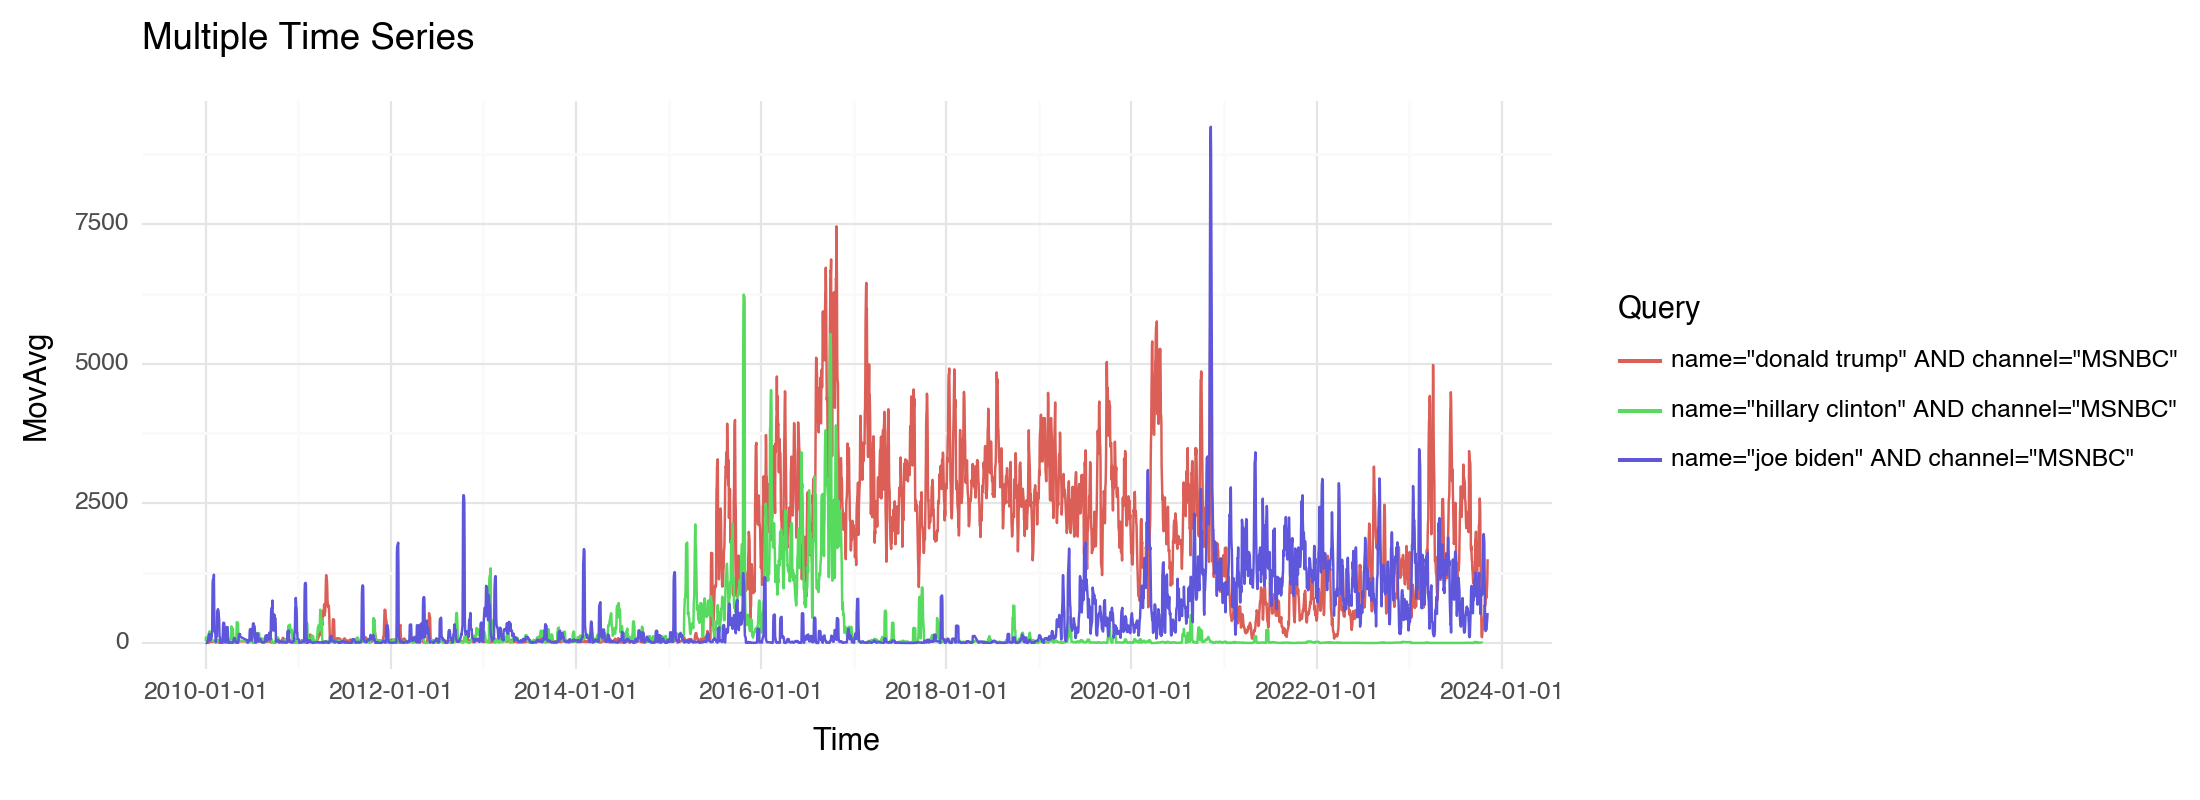

<Figure Size: (1100 x 400)>

In [14]:
(p9.ggplot(msnbc_long, p9.aes(x='Time', y='MovAvg', color='Query'))
 + p9.geom_line()
 + p9.theme_minimal()
 + p9.theme(figure_size=(11, 4))
 + p9.labs(title='Multiple Time Series', x='Time', y='MovAvg'))

/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


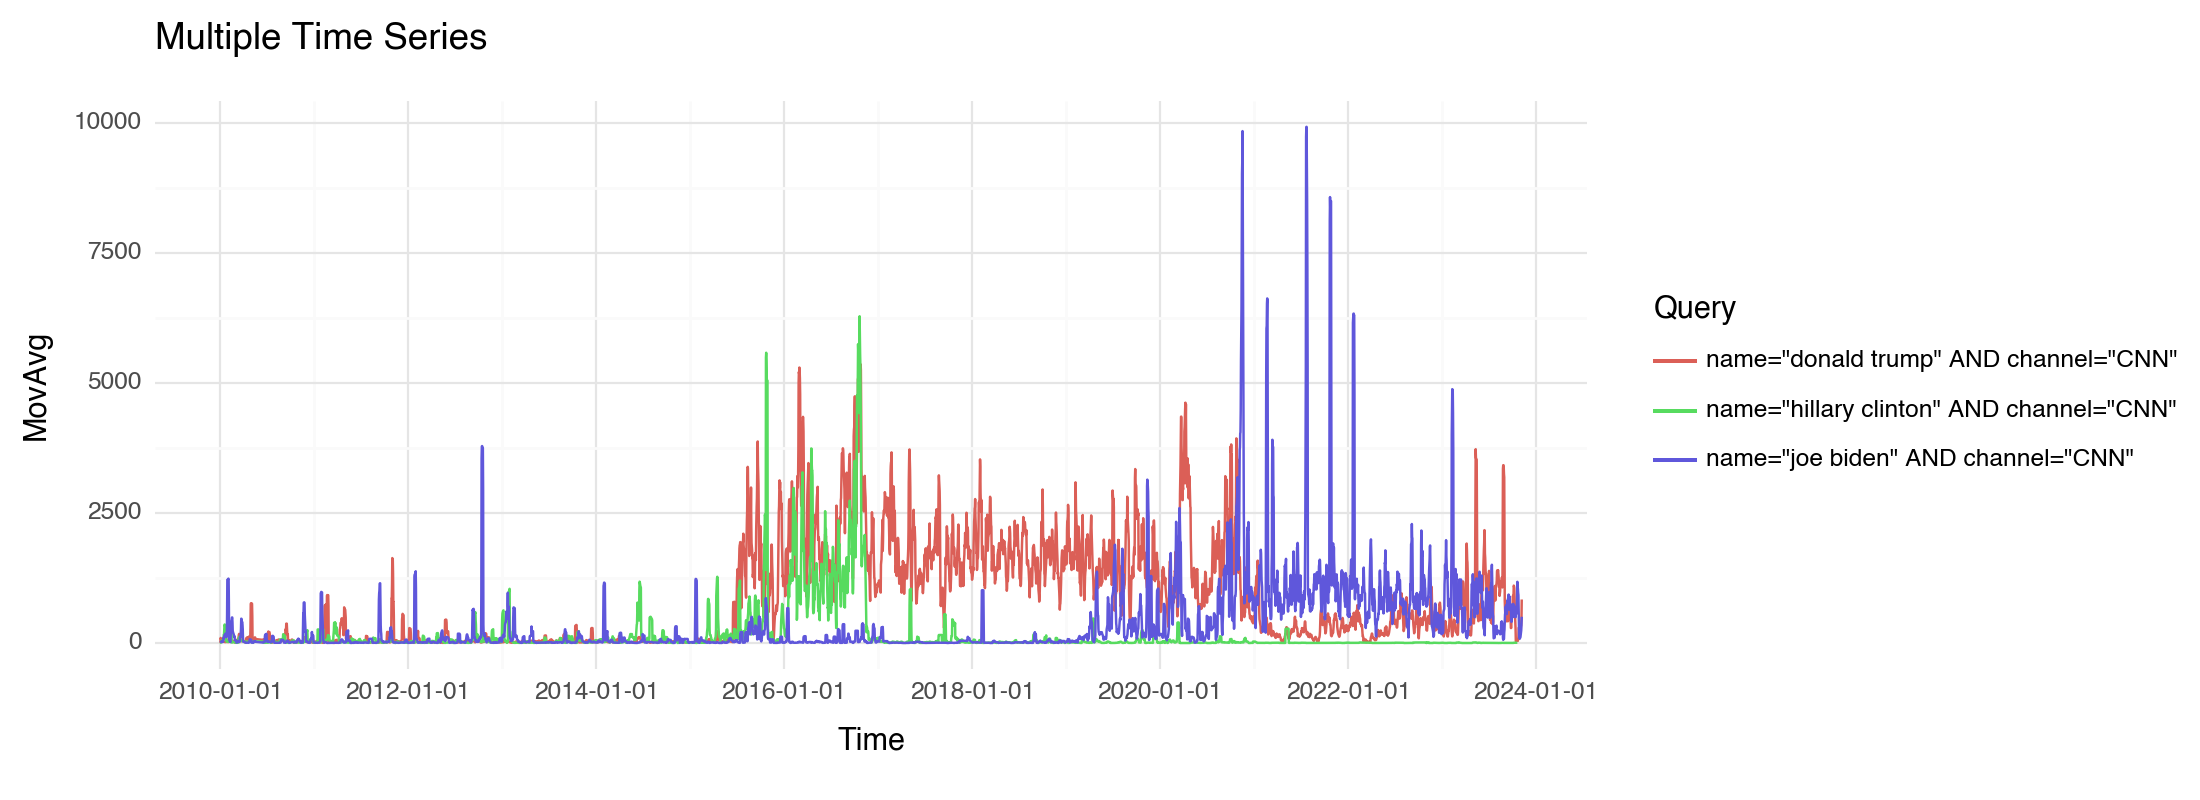

<Figure Size: (1100 x 400)>

In [15]:
(p9.ggplot(cnn_long, p9.aes(x='Time', y='MovAvg', color='Query'))
 + p9.geom_line()
 + p9.theme_minimal()
 + p9.theme(figure_size=(11, 4))
 + p9.labs(title='Multiple Time Series', x='Time', y='MovAvg'))

## Let's Look at 2023 Specifically

/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


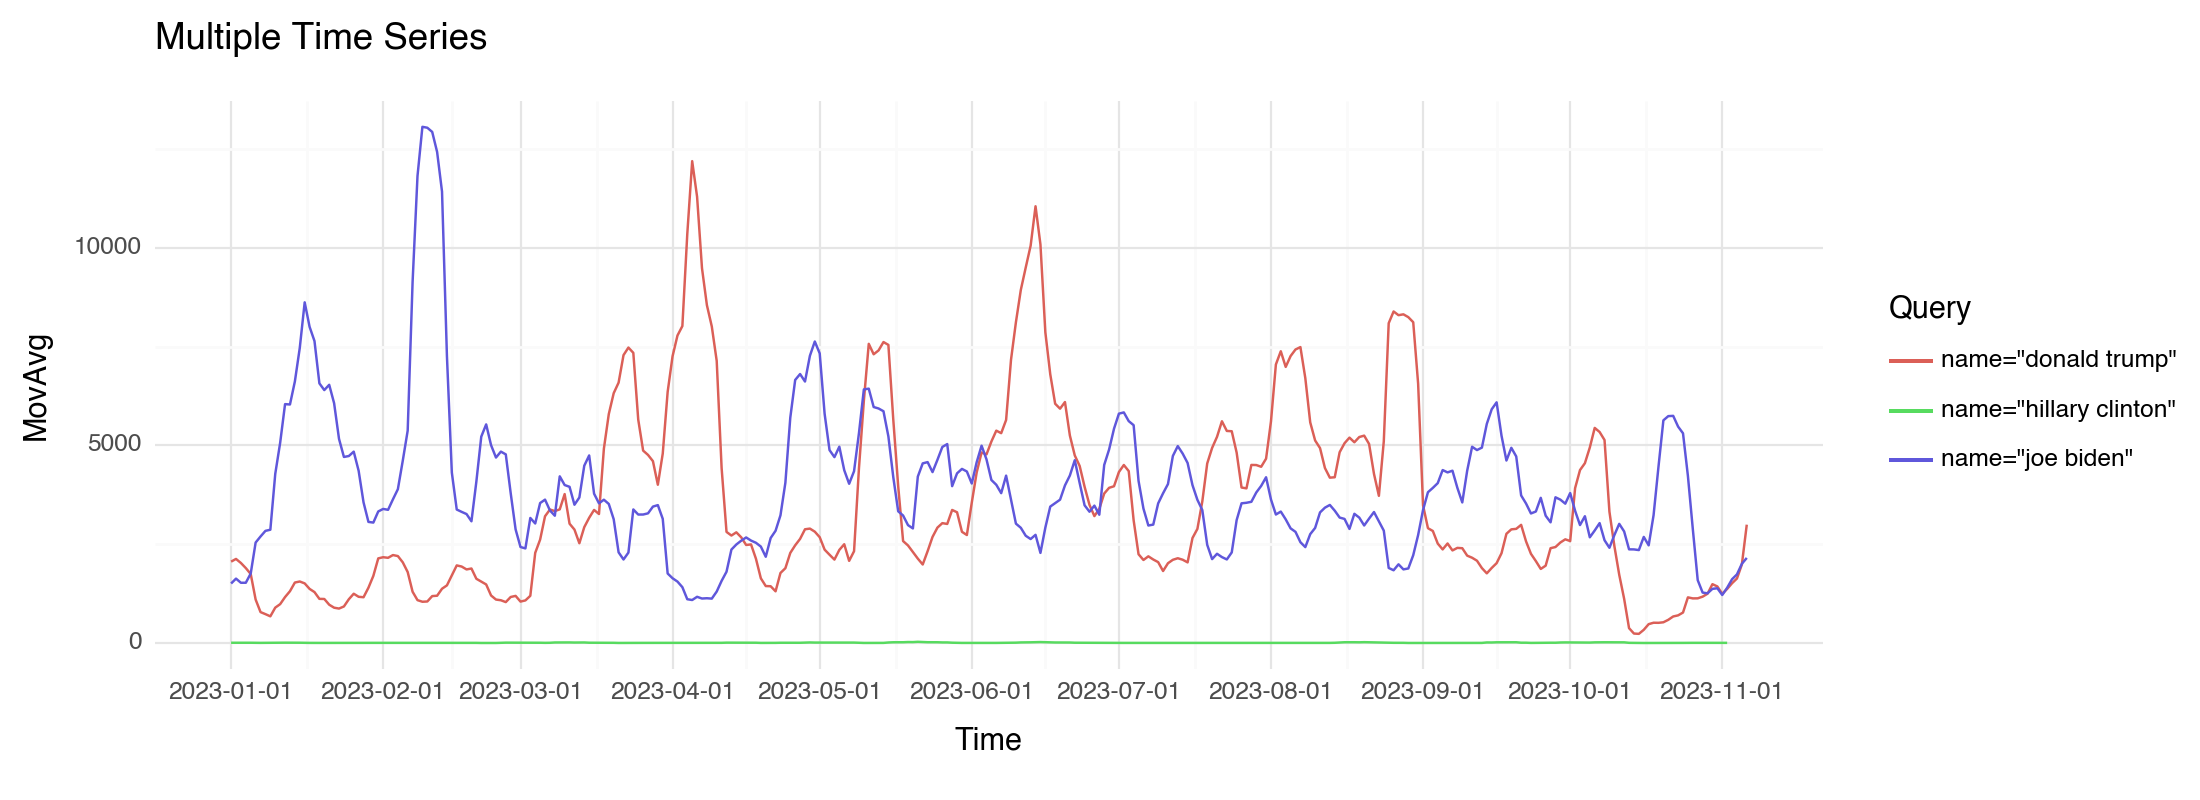

<Figure Size: (1100 x 400)>

In [20]:
(p9.ggplot(all_long[all_long['Time'].dt.year >= 2023], p9.aes(x='Time', y='MovAvg', color='Query'))
 + p9.geom_line()
 + p9.theme_minimal()
 + p9.theme(figure_size=(11, 4))
 + p9.labs(title='Multiple Time Series', x='Time', y='MovAvg'))

/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


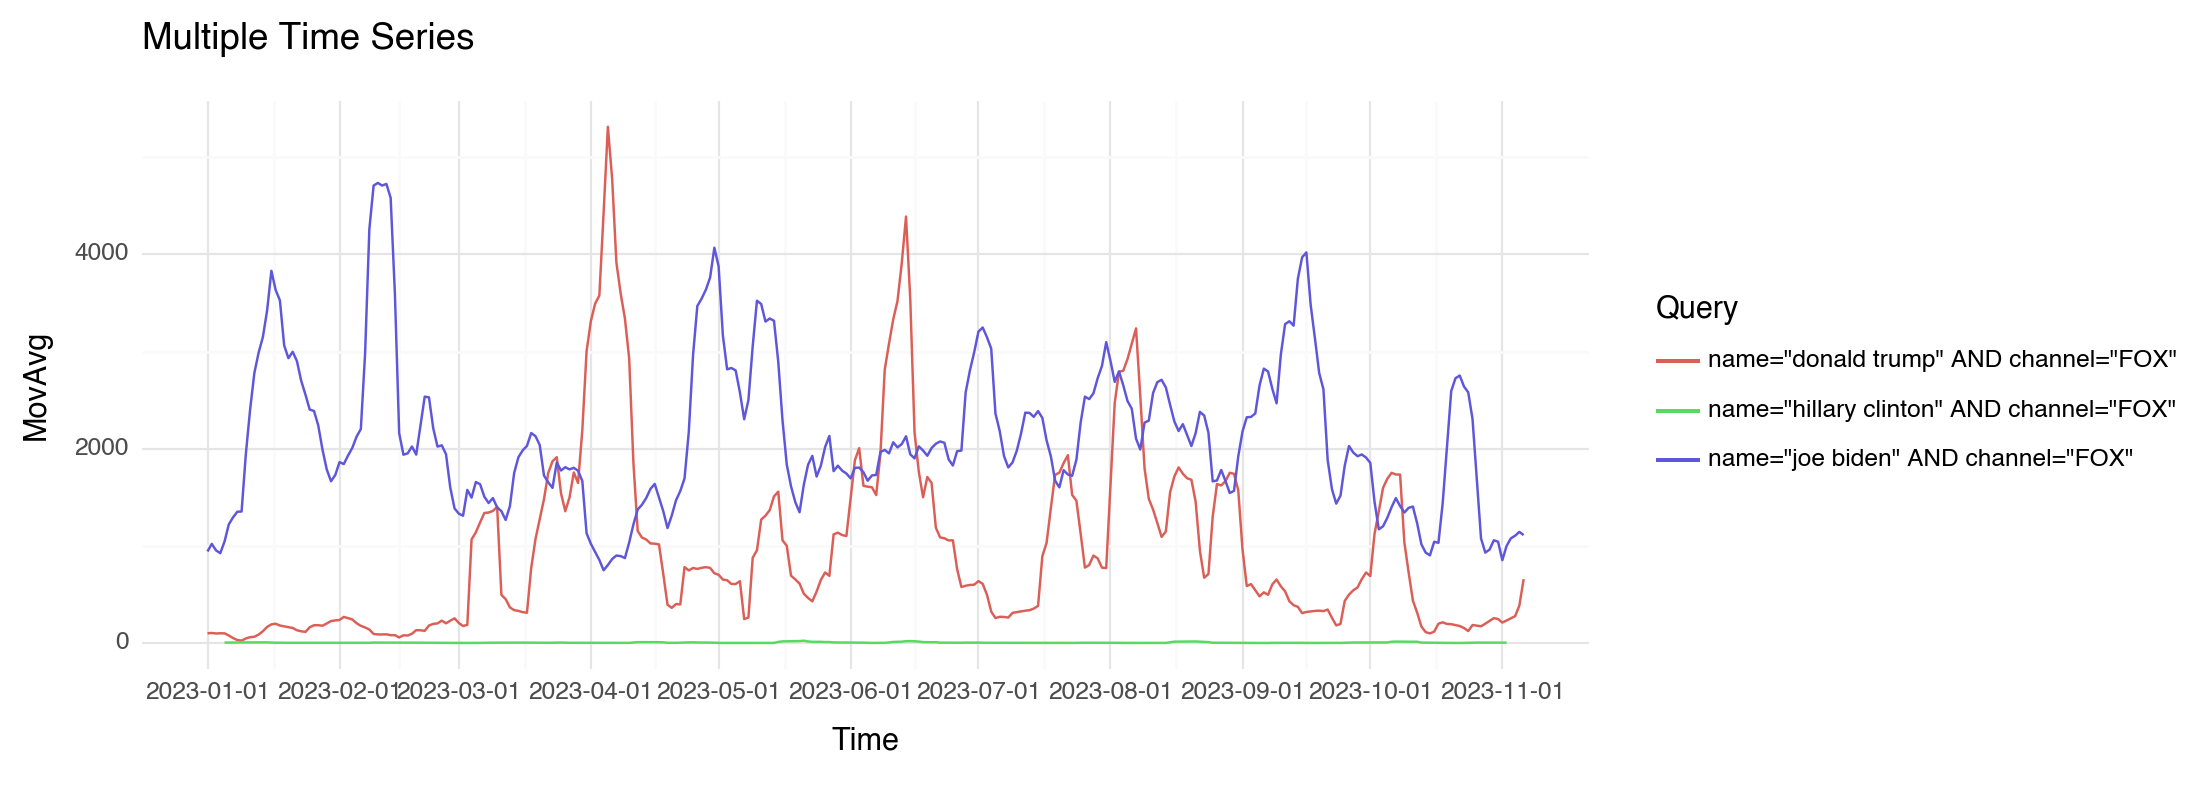

<Figure Size: (1100 x 400)>

In [21]:
(p9.ggplot(fox_long[fox_long['Time'].dt.year >= 2023], p9.aes(x='Time', y='MovAvg', color='Query'))
 + p9.geom_line()
 + p9.theme_minimal()
 + p9.theme(figure_size=(11, 4))
 + p9.labs(title='Multiple Time Series', x='Time', y='MovAvg'))

/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


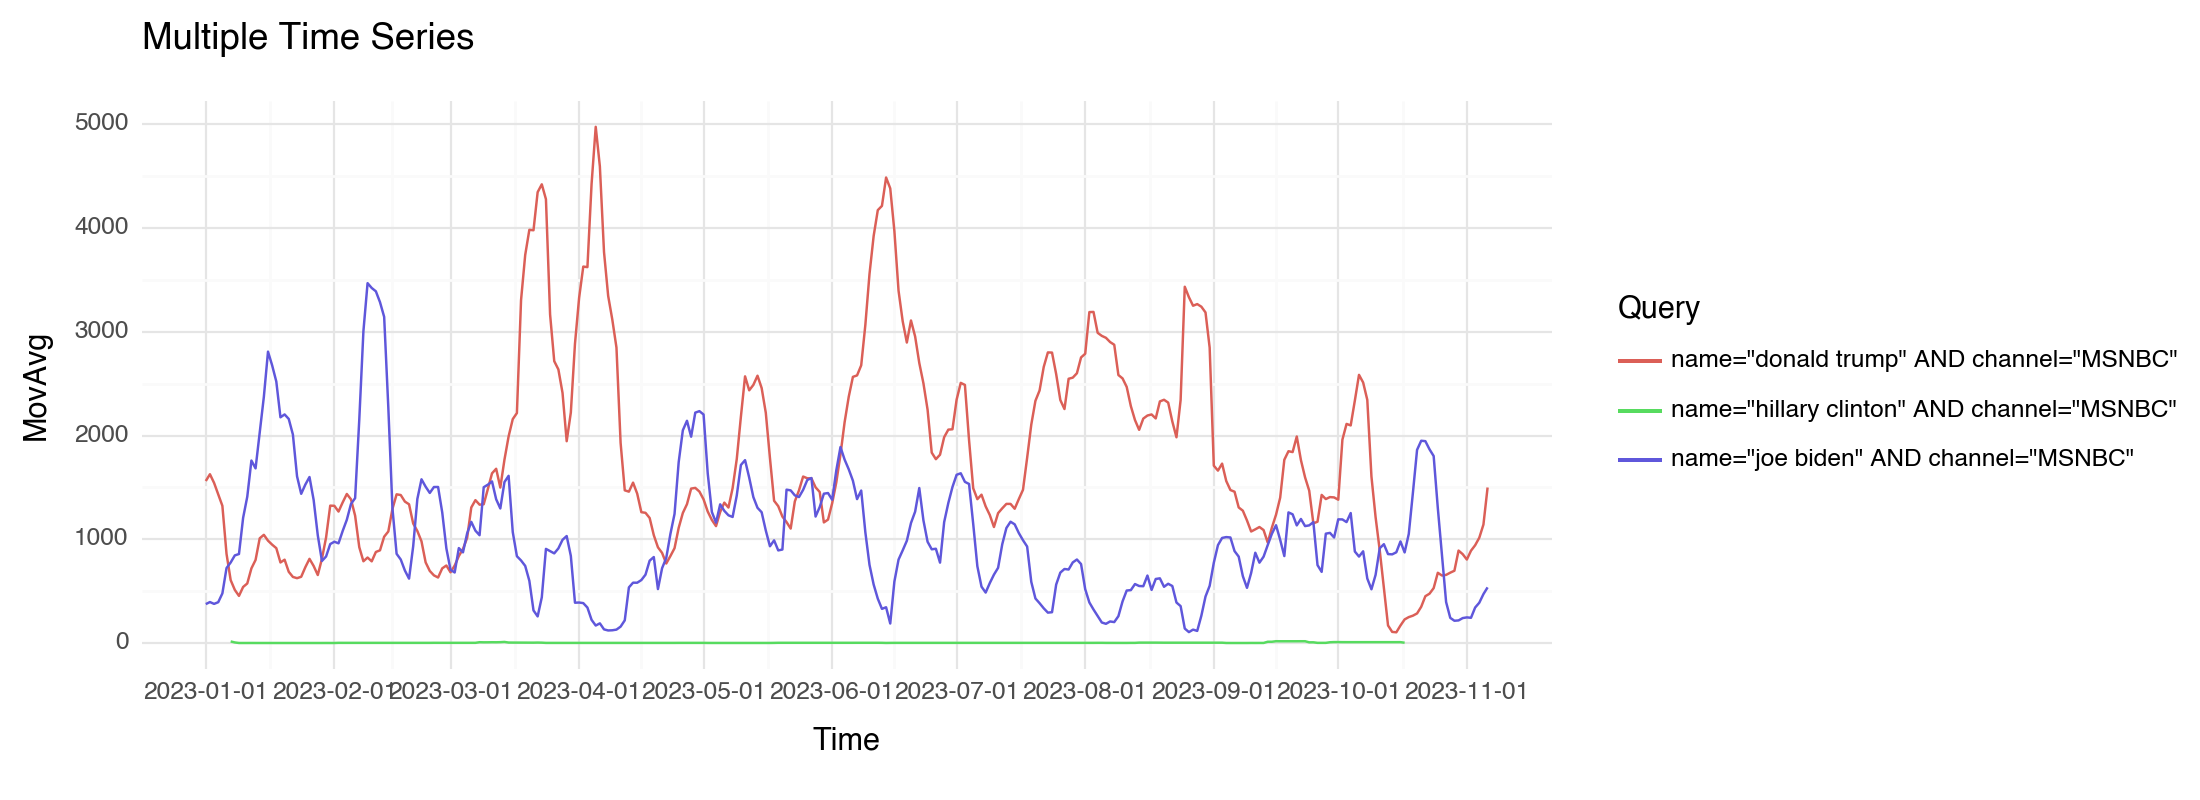

<Figure Size: (1100 x 400)>

In [22]:
(p9.ggplot(msnbc_long[msnbc_long['Time'].dt.year >= 2023], p9.aes(x='Time', y='MovAvg', color='Query'))
 + p9.geom_line()
 + p9.theme_minimal()
 + p9.theme(figure_size=(11, 4))
 + p9.labs(title='Multiple Time Series', x='Time', y='MovAvg'))

/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/anaconda3/envs/dataj/lib/python3.11/site-packages/mizani/scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


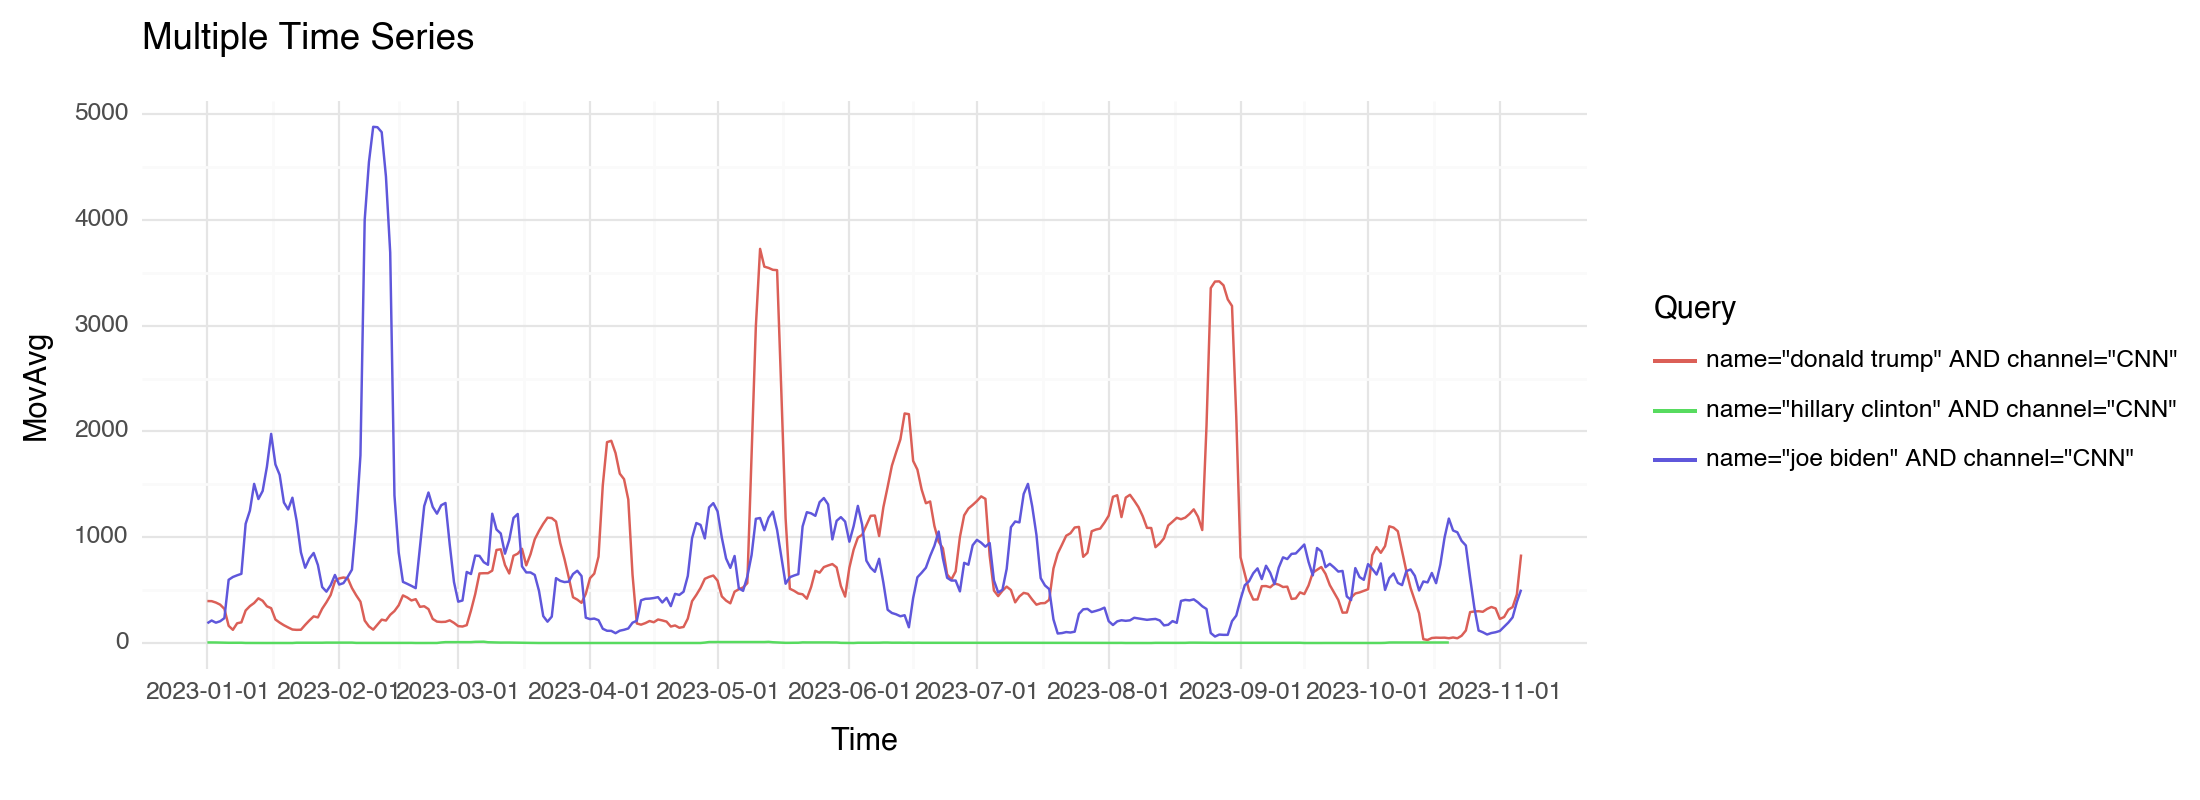

<Figure Size: (1100 x 400)>

In [23]:
(p9.ggplot(cnn_long[cnn_long['Time'].dt.year >= 2023], p9.aes(x='Time', y='MovAvg', color='Query'))
 + p9.geom_line()
 + p9.theme_minimal()
 + p9.theme(figure_size=(11, 4))
 + p9.labs(title='Multiple Time Series', x='Time', y='MovAvg'))